In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

In [3]:
# Normalize the dataset
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [4]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

#### Define the Baseline Model

In [20]:
def create_baseline_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = create_baseline_model()
baseline_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

#### Train and Evaluate the Baseline Model

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.0500 - loss: 4.2836 - val_accuracy: 0.1520 - val_loss: 3.5869
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.1714 - loss: 3.4762 - val_accuracy: 0.2169 - val_loss: 3.2393
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.2267 - loss: 3.1710 - val_accuracy: 0.2508 - val_loss: 3.0565
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.2632 - loss: 2.9743 - val_accuracy: 0.2763 - val_loss: 2.9083
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.3009 - loss: 2.7937 - val_accuracy: 0.2965 - val_loss: 2.7968
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.3217 - loss: 2.6751 - val_accuracy: 0.2986 - val_loss: 2.7872
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.3424 - loss: 2.5751 - val_accuracy: 0.3269 - val_loss: 2.6690
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.3637 - loss: 2.4797 - 

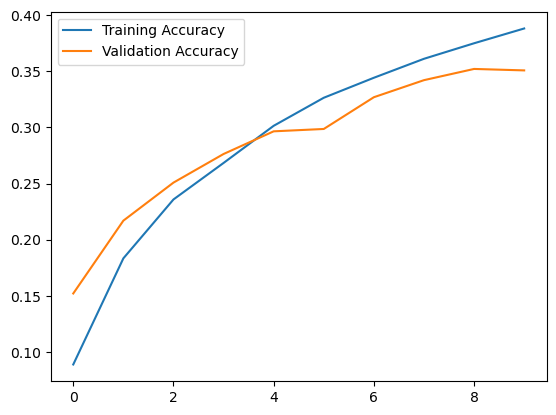

In [21]:
# Train the model
history = baseline_model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    batch_size=64
)

# Evaluate the model
test_loss, test_acc = baseline_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [24]:
# Get training accuracy, validation accuracy, training loss, and validation loss
training_accuracy = history.history['accuracy'][-1] 
validation_accuracy = history.history['val_accuracy'][-1]
training_loss = history.history['loss'][-1]  
validation_loss = history.history['val_loss'][-1]  

# Evaluate the model
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")
print(f"Training Loss: {training_loss:.4f}")
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Training Accuracy: 38.82%
Validation Accuracy: 35.08%
Training Loss: 2.3541
Validation Loss: 2.5401
Test Loss: 2.5401


#### Experiment with Advanced Architectures

- Use Pre-trained ResNet Model

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for CIFAR-100
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 38, 38, 3)         │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 16, 16, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 16, 16, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 16, 16, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 18, 18, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 8, 8, 64)          │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 8, 8, 64)          │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 8, 8, 64)          │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 8, 8, 256)         │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 8, 8, 256)         │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,137,956 (92.08 MB)

 Trainable params: 550,244 (2.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

- Train the ResNet Model

In [9]:
# Train the model
history_resnet = resnet_model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    batch_size=64
)

# Unfreeze base model layers for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_resnet_finetune = resnet_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    batch_size=64
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 230s 279ms/step - accuracy: 0.0129 - loss: 4.6364 - val_accuracy: 0.0197 - val_loss: 4.5478
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 188s 240ms/step - accuracy: 0.0208 - loss: 4.5392 - val_accuracy: 0.0294 - val_loss: 4.4919
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.0297 - loss: 4.4850 - val_accuracy: 0.0371 - val_loss: 4.4551
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.0323 - loss: 4.4537 - val_accuracy: 0.0338 - val_loss: 4.4412
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.0363 - loss: 4.4274 - val_accuracy: 0.0418 - val_loss: 4.3924
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.0437 - loss: 4.3742 - val_accuracy: 0.0454 - val_loss: 4.3325
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 239s 305ms/step - accuracy: 0.0492 - loss: 4.3245 - val_accuracy: 0.0487 - val_loss: 4.3315
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 349s 416ms/step - accuracy: 0.0502 -

In [10]:
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(test_images, test_labels)
print(f"ResNet Test Accuracy: {test_acc_resnet * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 227ms/step - accuracy: 0.2408 - loss: 3.5531
ResNet Test Accuracy: 23.89%


In [22]:
training_accuracy = history_resnet.history['accuracy'][-1]
validation_accuracy = history_resnet.history['val_accuracy'][-1]
training_loss = history_resnet.history['loss'][-1]
validation_loss = history_resnet.history['val_loss'][-1]

In [18]:
print(f"ResNet Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"ResNet Validation Accuracy: {validation_accuracy * 100:.2f}%")
print(f"ResNet Training Loss: {training_loss:.4f}")
print(f"ResNet Validation Loss: {validation_loss:.4f}")
print(f"ResNet Test Loss: {test_loss:.4f}")

ResNet Training Accuracy: 5.36%
ResNet Validation Accuracy: 5.21%
ResNet Training Loss: 4.2841
ResNet Validation Loss: 4.2828
ResNet Test Loss: 2.5170


#### Compare Results

In [25]:
print(f"Baseline Model Accuracy: {test_acc * 100:.2f}%")
print(f"ResNet Model Accuracy: {test_acc_resnet * 100:.2f}%")

Baseline Model Accuracy: 35.08%
ResNet Model Accuracy: 23.89%


In [26]:
# Accuracy values
baseline_accuracy = test_acc * 100
resnet_accuracy = test_acc_resnet * 100

# Model names for labeling
models = ['Baseline Model', 'ResNet Model']
accuracies = [baseline_accuracy, resnet_accuracy]

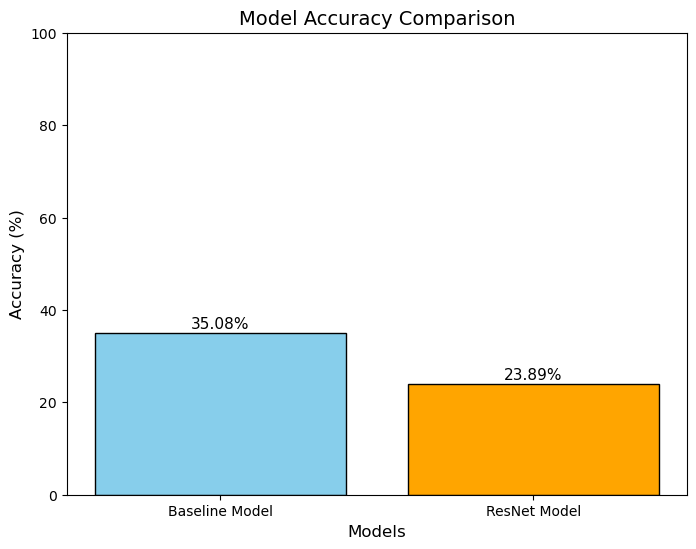

In [27]:
# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange'], edgecolor='black')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 100) 

# Annotate the bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=11, color='black')

plt.savefig("chart.png")
plt.show()
